In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()
!ls -lha kaggle.json
!mkdir -p ~/.kaggle #Create the directory
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d bohdanmynzar/twitter-propaganda-classification
!unzip twitter-propaganda-classification
#!kaggle datasets download -d vladimirsydor/propaganda-detection-our-data
#!unzip propaganda-detection-our-data

Saving kaggle.json to kaggle (1).json
-rw-r--r-- 1 root root 70 May  9 08:23 kaggle.json
Dataset URL: https://www.kaggle.com/datasets/bohdanmynzar/twitter-propaganda-classification
License(s): CC-BY-SA-4.0
twitter-propaganda-classification.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  twitter-propaganda-classification.zip
replace twitter_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: No


In [2]:
import pandas as pd

data = pd.read_csv("/content/twitter_dataset.csv")

In [3]:
#display(Markdown("**Human Propaganda Dataset:**"))


# To display all rows and columns
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

# To display all characters in column contents
#pd.set_option('display.max_colwidth', None)

#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', None)


human_propaganda = data[data['is_propaganda'] == True]
human_propaganda = human_propaganda[['text']]
human_propaganda.head(1)
#display(human_propaganda.head())
#display("Human Propaganda Text Dataset Shape: ",human_propaganda.shape)

,text
2,RT @natomission_ru: 🇷🇺#Russia Deputy FM Sergey...


In [4]:
chat_propaganda = pd.read_excel("/content/English ChatGPT-3.5 Synthesized Propaganda.xlsx")

In [5]:
chat_propaganda.head()

,text = 3247 samples
0,"In the post-war era, it is imperative that all..."
1,While Western powers are pointing fingers at u...
2,"While chaos and instability engulf Ukraine, Ru..."
3,Despite the efforts of Western powers to destr...
4,In the face of increasing aggression from Ukra...


In [6]:
chat_propaganda.shape

(255, 1)

In [7]:
human_propaganda.head()

,text
2,RT @natomission_ru: 🇷🇺#Russia Deputy FM Sergey...
3,#Azovstal fully liberated – Russian military\n...
5,'Intense battle' | Russian army surrounds last...
6,Russia’s FSB has released footage reportedly s...
7,"Hundreds of activists gathered in Washington, ..."


In [8]:
chat_propaganda.rename(columns={'text = 3247 samples': 'text'}, inplace=True)

In [9]:
chat_propaganda.head()

,text
0,"In the post-war era, it is imperative that all..."
1,While Western powers are pointing fingers at u...
2,"While chaos and instability engulf Ukraine, Ru..."
3,Despite the efforts of Western powers to destr...
4,In the face of increasing aggression from Ukra...


In [10]:
import pandas as pd

# Assuming df is your DataFrame
# Shuffle the DataFrame
shuffled_human_propaganda = human_propaganda.sample(frac=1)

# Get the first 255 samples
new_human_propaganda = shuffled_human_propaganda.head(255)
new_human_propaganda.head()
#print(new_human_propaganda.shape)

,text
4342,RT @RussianEmbassy: Ambassador #Kelin to @Time...
5484,High-precision strike takes out Ukrainian mili...
6631,"'The Cold War, a term coined 75 years ago, is ..."
2559,"On March 14, Tochka-U tactical missile was fir..."
8039,RT @CamboRusEmba: On 21 December Ambassador of...


In [11]:
import pandas as pd

# Assuming df1 and df2 are your DataFrames
# Concatenate the two DataFrames
concatenated_df = pd.concat([new_human_propaganda, chat_propaganda])

# If you want to reset index after concatenation
concatenated_df.reset_index(drop=True, inplace=True)
concatenated_df_shuffled = concatenated_df.sample(frac=1)
concatenated_df_shuffled.head()

,text
66,Did the White House really use TikTok stars as...
210,Russia views modern Ukraine as a ‘hostile’ cou...
277,Russia calls for the unification of all Russia...
289,Integration with Russia opens up new economic ...
456,Russia's commitment to traditional values is a...


In [12]:
concatenated_df_shuffled.shape

(510, 1)

In [13]:
concatenated_df_shuffled['is_propaganda'] = [True] * len(concatenated_df_shuffled)
concatenated_df_shuffled.head()

,text,is_propaganda
66,Did the White House really use TikTok stars as...,True
210,Russia views modern Ukraine as a ‘hostile’ cou...,True
277,Russia calls for the unification of all Russia...,True
289,Integration with Russia opens up new economic ...,True
456,Russia's commitment to traditional values is a...,True


In [14]:
#display(Markdown("**Clean (Non-Propagandistic) Text Dataset:**"))
clean_data = data[data['is_propaganda'] == False]
clean_data = clean_data[['text','is_propaganda']]
clean_data = clean_data.head(255)
display(clean_data.head())
display("Clean Text Dataset Shape: ",clean_data.shape)

,text,is_propaganda
0,Woman who held up poster of Marine Le Pen and ...,False
1,"⚡️Zelensky: Around 150,000 people trapped in M...",False
4,"RT @BloombergUK: ""He was almost foaming at the...",False
8,Key UN climate change finding widely misinterp...,False
10,Lawyers for the two European tourists argued m...,False


'Clean Text Dataset Shape: '

(255, 2)

In [15]:
classification_dataset_full = pd.concat([clean_data, concatenated_df_shuffled])
classification_dataset_full_shuffled = classification_dataset_full.sample(frac =1)
classification_dataset_full_shuffled.head()

,text,is_propaganda
463,Russia refuses to be bound by Western interpre...,True
31,RT @RusEmbUSA: 🇺🇸 has been swamped by a wave o...,True
456,Driver in pick-up truck flipped by Texas torna...,False
54,Paris students rally ahead of next round of pr...,True
462,Russia's sovereignty is non-negotiable. Let's ...,True


In [16]:
classification_dataset_full_shuffled.shape

(765, 2)

In [17]:
!pip install --upgrade keras

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import pandas as pd

from IPython.display import display, Markdown

In [19]:
import keras
from keras import ops
from keras import layers

import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [20]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)

In [21]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = ops.shape(x)[-1]
        positions = ops.arange(start=0, stop=maxlen, step=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [22]:
vocab_size = 20000  # Only consider the top 20k words
maxlen = 200  # Only consider the first 200 words of each movie review

features = classification_dataset_full_shuffled['text']
labels = classification_dataset_full_shuffled['is_propaganda']

# Tokenize the text data
vocab_size = 10000  # Тhe size of your vocabulary
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(features)

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(features)

# Pad sequences to ensure uniform length
maxlen = 200  # Define the maximum length of sequences
padded_sequences = pad_sequences(sequences, maxlen=maxlen)

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.5, random_state=42)

print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
print(len(x_test), "Testing sequences")

612 Training sequences
76 Validation sequences
77 Testing sequences


In [23]:
embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

In [24]:
inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(60, activation="relu")(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(40, activation="relu")(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(2, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [25]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(
    x_train, y_train, batch_size=32, epochs=50, validation_data=(x_val, y_val)
)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - accuracy: 0.6501 - loss: 0.6700 - val_accuracy: 0.6711 - val_loss: 0.6473
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.6602 - loss: 0.6622 - val_accuracy: 0.6711 - val_loss: 0.6329
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.6684 - loss: 0.6359 - val_accuracy: 0.6711 - val_loss: 0.6296
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.6793 - loss: 0.6423 - val_accuracy: 0.6711 - val_loss: 0.6543
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - accuracy: 0.6537 - loss: 0.6466 - val_accuracy: 0.6711 - val_loss: 0.6287
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 164ms/step - accuracy: 0.6704 - loss: 0.6263 - val_accuracy: 0.6711 - val_loss: 0.6210
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.6728 - loss: 0.6162 - val_accuracy: 0.6711 - val_loss: 0.6283
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.6411 - loss: 0.6587 - val_accuracy: 0.6711 

In [26]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7802 - loss: 1.6951
Test Loss: 1.832437515258789
Test Accuracy: 0.7792207598686218


**Conclusion:** For such a small amount of data the classifier worked very well, 80% is a great accuracy, even though the classifier is overfitted. More data could correct that, but OpenAI should be notified about public ChatGPT 3.5 being dangerous, it gives well-structed propaganda way too easily. This only proves the point of the research of integrating both human and AI generated data into classifiers for classifying propaganda. It's too easy to gemerate well-made propagnda nowadays with public AI chats. The robustness of language models should be heavily improved, so research must be held by the companies for their products to achieve that.

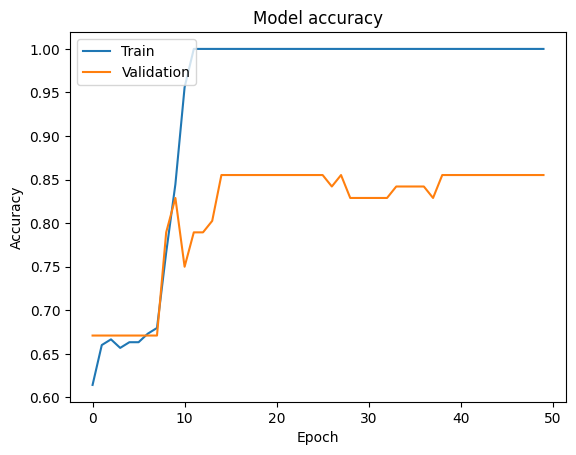

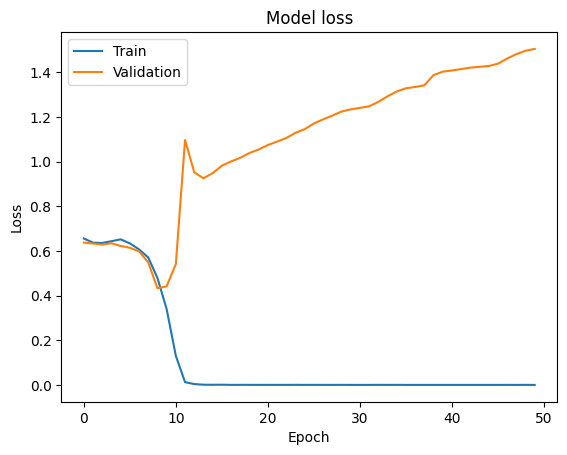

In [40]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()